In [1]:
# Импорт библиотек
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [2]:
# Загрузка данных с разделителем и кодировкой utf-8
cases = pd.read_csv('cases.csv', sep=';', encoding='utf-8-sig', on_bad_lines='skip')
diaries = pd.read_csv('diaries.csv', sep=';', encoding='utf-8', on_bad_lines='skip')
marks = pd.read_csv('marks.csv', sep=';', encoding='utf-8-sig', on_bad_lines='skip')

In [3]:
# Проверяем названия столбцов
print("Названия столбцов в 'cases':", cases.columns.tolist())
print("Названия столбцов в 'diaries':", diaries.columns.tolist())
print("Названия столбцов в 'marks':", marks.columns.tolist())

Названия столбцов в 'cases': ['Номер поручения', 'Заказчик', 'Дата поручения', 'Выполнено', 'Дата выполнения', 'Затрачено дней', 'Сумма вознаграждения', 'Описание']
Названия столбцов в 'diaries': ['Номер поручения', 'Герой', 'Запись в дневнике', 'Затрачено часов', 'Роль']
Названия столбцов в 'marks': ['Номер поручения', 'Герой', 'Оценка за качество', 'Оценка по срокам', 'Оценка за вежливость']


# **Анализ датасетов**

## Датасет marks.csv

In [4]:
marks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Номер поручения       500 non-null    int64 
 1   Герой                 500 non-null    object
 2   Оценка за качество    500 non-null    int64 
 3   Оценка по срокам      500 non-null    int64 
 4   Оценка за вежливость  500 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 19.7+ KB


In [5]:
# Группировка данных по столбцу "Герой" и подсчет средних оценок
summary = marks.groupby('Герой').agg(
    Средняя_оценка_за_качество=('Оценка за качество', 'mean'),
    Средняя_оценка_по_срокам=('Оценка по срокам', 'mean'),
    Средняя_оценка_за_вежливость=('Оценка за вежливость', 'mean'),
).reset_index()

# Отображаем результат
summary

,Герой,Средняя_оценка_за_качество,Средняя_оценка_по_срокам,Средняя_оценка_за_вежливость
0,Агата,3.939394,3.727273,4.000000
1,Альфред,3.871795,3.692308,3.897436
2,Бендер,3.928571,3.928571,3.928571
3,Бенедикт,3.785714,3.880952,3.928571
4,Глюкоза,3.863636,3.931818,4.000000
5,Леопольд,3.893617,3.808511,3.872340
6,Мартин,3.967742,3.935484,3.935484
7,Пастушок,4.000000,3.836735,4.000000
8,Синеглазый,3.878049,3.756098,3.878049
9,Соня,3.888889,3.972222,3.833333


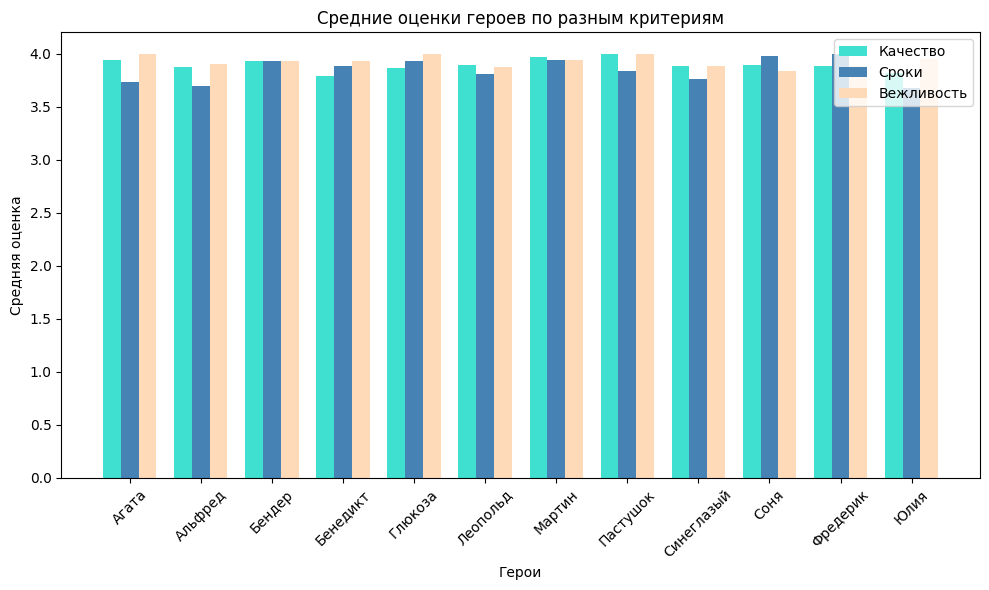

In [6]:
import matplotlib.pyplot as plt

# Создание гистограммы
# Задаем положение столбцов для каждого героя
x = range(len(summary))

# Устанавливаем ширину столбцов
width = 0.25

# Создаем фигуру
plt.figure(figsize=(10, 6))

# Добавляем столбцы для каждой метрики
plt.bar([p - width for p in x], summary['Средняя_оценка_за_качество'], width=width, label='Качество', color='#40E0D0')
plt.bar(x, summary['Средняя_оценка_по_срокам'], width=width, label='Сроки', color='#4682B4')
plt.bar([p + width for p in x], summary['Средняя_оценка_за_вежливость'], width=width, label='Вежливость', color='#FFDAB9')

# Добавляем заголовок и подписи
plt.title('Средние оценки героев по разным критериям')
plt.xlabel('Герои')
plt.xticks(x, summary['Герой'], rotation=45)
plt.ylabel('Средняя оценка')
plt.legend()

# Показываем график
plt.tight_layout()
plt.show()

In [7]:
# Посчитаем, сколько поручений выполнил каждый из героев
completed_tasks_count = marks.groupby('Герой')['Номер поручения'].nunique().reset_index()
completed_tasks_count.columns = ['Герой', 'Количество выполненных поручений']
completed_tasks_count

,Герой,Количество выполненных поручений
0,Агата,33
1,Альфред,39
2,Бендер,42
3,Бенедикт,42
4,Глюкоза,44
5,Леопольд,47
6,Мартин,31
7,Пастушок,49
8,Синеглазый,41
9,Соня,36


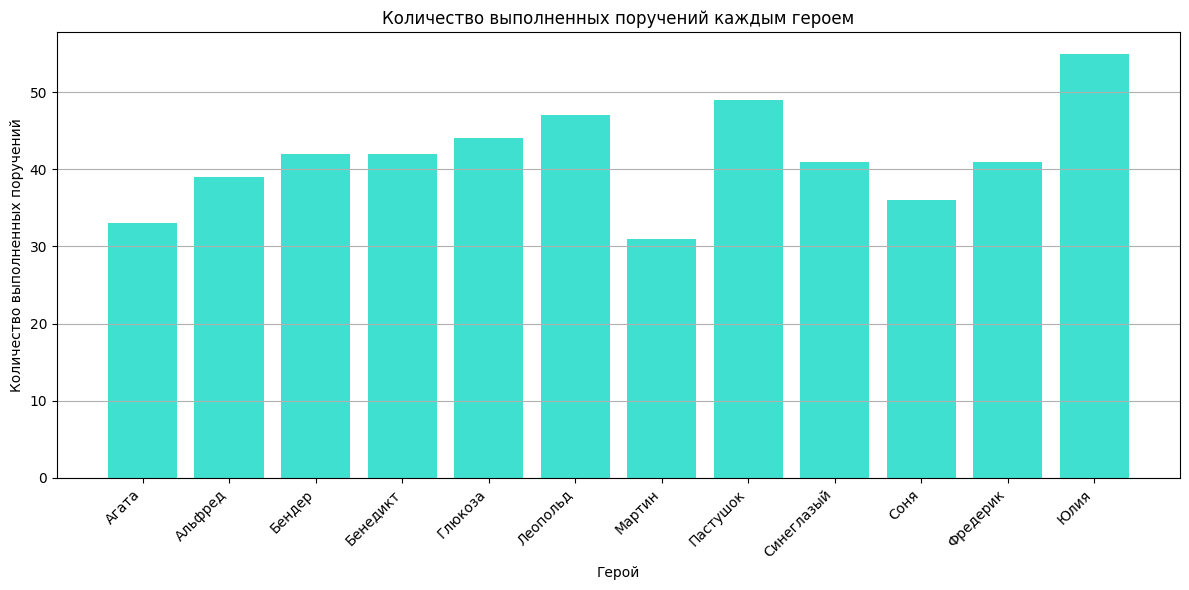

In [87]:
# Посмотроим гистаграмму для наглядности
plt.figure(figsize=(12, 6))
plt.bar(completed_tasks_count['Герой'], completed_tasks_count['Количество выполненных поручений'], color='#40E0D0')
plt.xlabel('Герой')
plt.ylabel('Количество выполненных поручений')
plt.title('Количество выполненных поручений каждым героем')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

**Выводы по датасету:**
*   12 героев
*   Выведены средние оценки за вежливость, срокость и качество
*   Посчитано кол-во поручений, которые выполнил каждый из героев

## Датасет diaries.csv

In [8]:
diaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 888 entries, 0 to 887
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Номер поручения    888 non-null    int64 
 1   Герой              888 non-null    object
 2   Запись в дневнике  888 non-null    object
 3   Затрачено часов    888 non-null    object
 4   Роль               888 non-null    object
dtypes: int64(1), object(4)
memory usage: 34.8+ KB


In [9]:
# Выведем, сколько раз каждый из героев выступал в определенной роли
role_counts = diaries.groupby(['Герой', 'Роль']).size().reset_index(name='Количество')
pivot_table = role_counts.pivot(index='Герой', columns='Роль', values='Количество').fillna(0).round().astype(int)
pivot_table

Роль,боевой маг,лекарь,лучник,мечник,рейнджер,следопыт
Герой,,,,,,
Агата,0,0,17,0,7,24
Альфред,0,22,0,26,13,20
Бендер,0,0,0,22,6,37
Бенедикт,0,16,0,23,10,30
Глюкоза,25,0,0,0,9,32
Леопольд,0,0,0,25,12,36
Мартин,0,8,15,0,8,31
Пастушок,0,0,0,22,8,39
Синеглазый,0,18,0,21,10,29


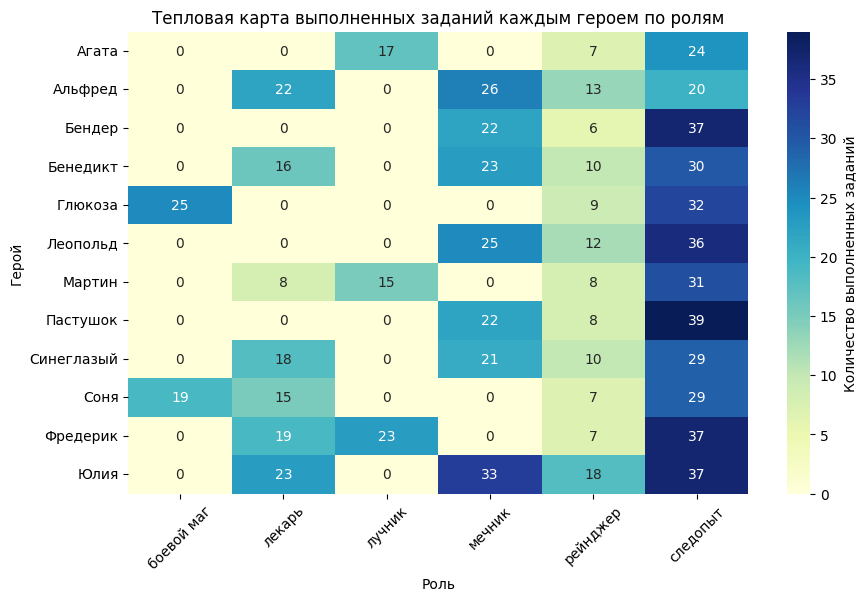

In [10]:
import seaborn as sns

# Построение тепловой карты
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu', cbar_kws={'label': 'Количество выполненных заданий'})
plt.title('Тепловая карта выполненных заданий каждым героем по ролям')
plt.xlabel('Роль')
plt.ylabel('Герой')
plt.xticks(rotation=45)
plt.show()

In [11]:
# Выведем, сколько времени герой тратил в среднем на определенное задание
# Преобразование столбца "Затрачено часов" в числовой тип
diaries['Затрачено часов'] = pd.to_numeric(diaries['Затрачено часов'], errors='coerce')
# Удаление строк с NaN
diaries.dropna(subset=['Затрачено часов'], inplace=True)
average_time = diaries.groupby(['Герой', 'Запись в дневнике'])['Затрачено часов'].mean().reset_index(name='Среднее время (часов)')
average_time['Среднее время (часов)'] = average_time['Среднее время (часов)'].round(1)
pivot_table = average_time.pivot(index='Герой', columns='Запись в дневнике', values='Среднее время (часов)').fillna(0)
pivot_table

Запись в дневнике,выследить цель,залечить раны,найти пропажу,отыскать заказчика,разжечь костёр
Герой,,,,,
Агата,4.0,0.0,3.0,2.0,2.0
Альфред,4.0,18.0,3.0,2.0,1.7
Бендер,12.0,0.0,9.0,6.0,0.0
Бенедикт,6.0,6.0,0.0,3.0,2.0
Глюкоза,6.0,0.0,0.0,3.0,2.0
Леопольд,6.0,0.0,0.0,3.0,1.3
Мартин,6.0,18.0,0.0,3.0,1.0
Пастушок,12.0,0.0,9.0,6.0,1.0
Синеглазый,6.0,18.0,0.0,3.0,1.0


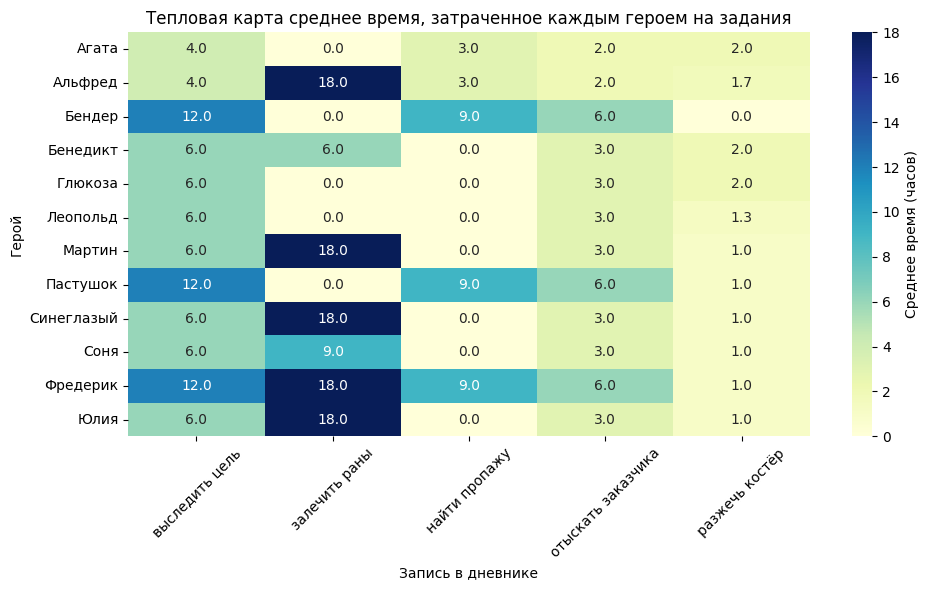

In [12]:
# Построение тепловой карты
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='.1f', cmap='YlGnBu', cbar_kws={'label': 'Среднее время (часов)'})
plt.title('Тепловая карта среднее время, затраченное каждым героем на задания')
plt.xlabel('Запись в дневнике')
plt.ylabel('Герой')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
!pip install squarify

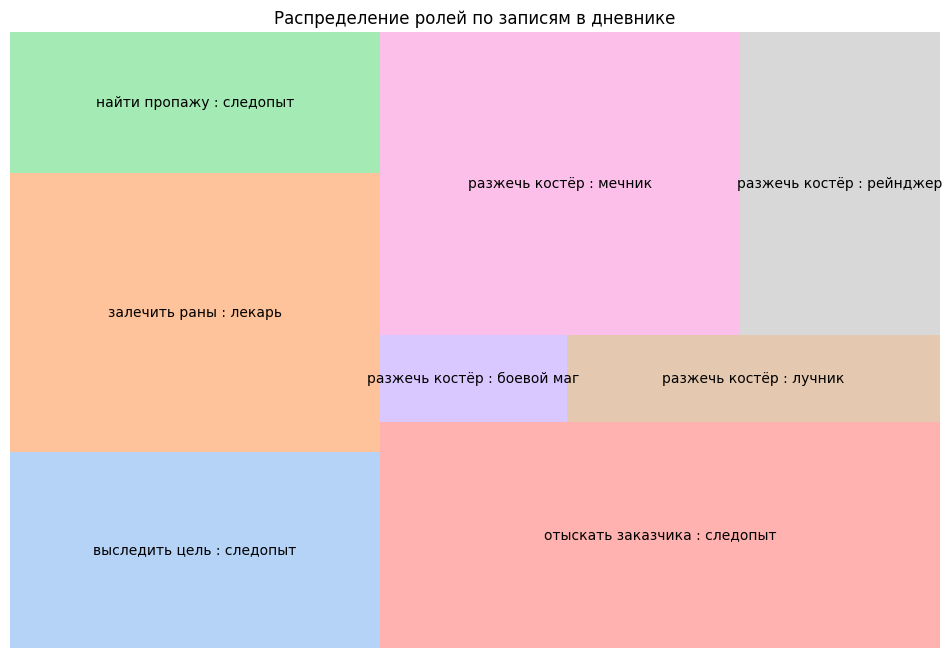

In [14]:
import squarify
# Шаг 1: Подсчет количества ролей для каждой записи в дневнике
role_counts = diaries.groupby(['Запись в дневнике', 'Роль']).size().reset_index(name='Количество')

# Шаг 2: Сгруппировать данные для создания диаграммы пакетов
labels = role_counts['Запись в дневнике'] + ' : ' + role_counts['Роль']
sizes = role_counts['Количество']

# Шаг 3: Построение диаграммы "пакета"
plt.figure(figsize=(12, 8))
squarify.plot(sizes=sizes, label=labels, alpha=.8, color=sns.color_palette('pastel', len(sizes)))
plt.title('Распределение ролей по записям в дневнике')
plt.axis('off')
plt.show()

**Выводы по датасету:**
*   Определены роли, которые могут выполнять герои
*   Посчитано среднее время, за которое герой выполняет действие
*   Соотнесены записи в дневниках, которые соответствуют определенной роли
<br>

**Умения героев:**
*   Агата - лучник, рейнджер, следопыт
*   Альфред - лекарь, мечник, рейнджер, следопыт
*   Бендер - мечник, рейнджер, следопыт
*   Бенедикт - лекарь, мечник, рейнджер, следопыт
*   Глюкоза - боевой маг, рейнджер, следопыт
*   Леопольд - мечник, рейнджер, следопыт
*   Мартин - лекарь, лучник, рейнджер, следопыт
*   Пастушок - мечник, рейнджер, следопыт
*   Синеглазый - лекарь, мечник, рейнджер, следопыт
*   Соня - боевой маг, лекарь, рейнджер, следопыт
*   Фредерик - лекарь, лучник, рейнджер, следопыт
*   Юлия - лекарь, мечник, рейнджер, следопыт
<br>

**Распространенность навыков:**
*   Боевой мог - 2/12
*   Лекарь - 7/12
*   Лучник - 3/12
*   Мечник - 7/12
*   Рейнджер - 12/12
*   Следопыт - 12/12
<br>
Тактика: сначала распределяем самые редкие навыки по заданиям, затем более распространенные (боевой маг - лучник - лекарь - мечник - рейнджер - следопыт)

**Соотнесение роли с заданием:**
*   Найти пропажу - следопыт
*   Разжечь костер - мечник, рейнджер, боевой маг, лучник
*   Залечить раны - лекарь
*   Выследить цель - следопыт
*   Отыскать заказчика - следопыт

## Датасет cases.csv

In [15]:
cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Номер поручения       500 non-null    int64  
 1   Заказчик              500 non-null    object 
 2   Дата поручения        500 non-null    object 
 3   Выполнено             500 non-null    object 
 4   Дата выполнения       481 non-null    object 
 5   Затрачено дней        481 non-null    float64
 6   Сумма вознаграждения  500 non-null    int64  
 7   Описание              500 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 31.4+ KB


In [16]:
!pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 18.7 MB/s eta 0:00:00


In [18]:
# решим задачу тематического моделирования, чтобы рассмотреть наиболее часто встречающиеся описания заданий
import pandas as pd
import nltk
from nltk.corpus import stopwords
from gensim import corpora
from gensim.models import LdaModel
import pyLDAvis.gensim_models
import pyLDAvis
import re

# Предварительная обработка текста
nltk.download('stopwords')  # Если не загружены стоп-слова
stop_words = set(stopwords.words('russian'))

def preprocess_text(text):
    # Приводим к нижнему регистру, удаляем знаки препинания и стоп-слова
    text = text.lower()
    text = re.sub(r'\W+', ' ', text)  # Удаляем знаки препинания
    words = text.split()
    clean_words = [word for word in words if word not in stop_words]
    return clean_words

# Применяем обработку ко всему столбцу 'Описание'
cases['Processed'] = cases['Описание'].apply(preprocess_text)

# Создаем словарь и корпус
dictionary = corpora.Dictionary(cases['Processed'])
corpus = [dictionary.doc2bow(text) for text in cases['Processed']]

# Создаем модель LDA
num_topics = 5  # Задаем количество тем
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

# Выводим темы
for idx, topic in lda_model.print_topics(-1):
    print(f"Тема {idx}: {topic}")

# Визуализация результатов
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Тема 0: 0.123*"нужно" + 0.123*"пещере" + 0.091*"дракон" + 0.067*"каменное" + 0.067*"чудовище" + 0.067*"огромное" + 0.066*"уничтожить" + 0.065*"завёлся" + 0.058*"появвилось" + 0.058*"убить"
Тема 1: 0.122*"скорее" + 0.112*"нужно" + 0.091*"её" + 0.071*"вернуть" + 0.050*"найти" + 0.049*"драгоценность" + 0.042*"документами" + 0.042*"сумка" + 0.039*"городе" + 0.034*"места"
Тема 2: 0.160*"города" + 0.160*"недалеко" + 0.129*"нужно" + 0.052*"убить" + 0.049*"заметили" + 0.048*"рюкзак" + 0.042*"лесу" + 0.031*"разбойников" + 0.025*"звери" + 0.024*"скорее"
Тема 3: 0.103*"нужно" + 0.084*"монстры" + 0.083*"найти" + 0.082*"похитили" + 0.082*"путников" + 0.073*"осмотрите" + 0.073*"возможные" + 0.073*"укрытия" + 0.054*"похищенных" + 0.042*"освободить"
Тема 4: 0.113*"нужно" + 0.094*"лесу" + 0.052*"дороге" + 0.041*"деревни" + 0.041*"монстров" + 0.038*"нападают" + 0.038*"людей" + 0.037*"разбойники" + 0.036*"заметили" + 0.034*"пещеры"


# **Разработка рекомендаций по командам**

## Вводные на основании анализа датасета

In [19]:
from itertools import combinations

# Данные о героях и их умениях
heroes = {
    "Агата": ["лучник", "рейнджер", "следопыт"],
    "Альфред": ["лекарь", "мечник", "рейнджер", "следопыт"],
    "Бендер": ["мечник", "рейнджер", "следопыт"],
    "Бенедикт": ["лекарь", "мечник", "рейнджер", "следопыт"],
    "Глюкоза": ["боевой маг", "рейнджер", "следопыт"],
    "Леопольд": ["мечник", "рейнджер", "следопыт"],
    "Мартин": ["лекарь", "лучник", "рейнджер", "следопыт"],
    "Пастушок": ["мечник", "рейнджер", "следопыт"],
    "Синеглазый": ["лекарь", "мечник", "рейнджер", "следопыт"],
    "Соня": ["боевой маг", "лекарь", "рейнджер", "следопыт"],
    "Фредерик": ["лекарь", "лучник", "рейнджер", "следопыт"],
    "Юлия": ["лекарь", "мечник", "рейнджер", "следопыт"],
}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
# Распространенность навыков
skill_prevalence = {
    "боевой маг": 2/12,
    "лекарь": 7/12,
    "лучник": 3/12,
    "мечник": 7/12,
    "рейнджер": 12/12,
    "следопыт": 12/12,
}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
# Задания и требуемые навыки
tasks = {
    "Найти пропажу": ["следопыт"],
    "Разжечь костер": ["мечник", "рейнджер", "боевой маг", "лучник"],
    "Залечить раны": ["лекарь"],
    "Выследить цель": ["следопыт"],
    "Отыскать заказчика": ["следопыт"]
}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Обучение модели

In [37]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [38]:
# Объединяем два датасета по "Номер поручения"
merged_data = pd.merge(cases, diaries, on='Номер поручения', how='left')

# Печатаем первые несколько строк объединенного датафрейма
print("\nОбъединенные данные:")
merged_data.head()


Объединенные данные:


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Номер поручения,Заказчик,Дата поручения,Выполнено,Дата выполнения,Затрачено дней,Сумма вознаграждения,Описание,Processed,Герой,Запись в дневнике,Затрачено часов,Роль
0,11000,Анна,1051-08-11,да,1051-08-21,4.0,6000,В лесу по дороге от пещеры звери нападают на л...,"[лесу, дороге, пещеры, звери, нападают, людей,...",Мартин,разжечь костёр,1.0,рейнджер
1,11000,Анна,1051-08-11,да,1051-08-21,4.0,6000,В лесу по дороге от пещеры звери нападают на л...,"[лесу, дороге, пещеры, звери, нападают, людей,...",Мартин,выследить цель,6.0,следопыт
2,11000,Анна,1051-08-11,да,1051-08-21,4.0,6000,В лесу по дороге от пещеры звери нападают на л...,"[лесу, дороге, пещеры, звери, нападают, людей,...",Мартин,разжечь костёр,1.0,лучник
3,11001,Мария,1051-07-09,да,1051-09-02,2.0,20000,В лесу по дороге от пещеры были замечены разбо...,"[лесу, дороге, пещеры, замечены, разбойники, н...",Альфред,разжечь костёр,1.0,рейнджер
4,11001,Мария,1051-07-09,да,1051-09-02,2.0,20000,В лесу по дороге от пещеры были замечены разбо...,"[лесу, дороге, пещеры, замечены, разбойники, н...",Альфред,залечить раны,18.0,лекарь


In [39]:
# Проверка на наличие NaN
print("Проверка на наличие пустых значений:")
print(merged_data.isnull().sum())

Проверка на наличие пустых значений:
Номер поручения          0
Заказчик                 0
Дата поручения           0
Выполнено                0
Дата выполнения         19
Затрачено дней          19
Сумма вознаграждения     0
Описание                 0
Processed                0
Герой                   79
Запись в дневнике       79
Затрачено часов         79
Роль                    79
dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [40]:
# Удаление строк с NaN значениями в целевых столбцах
features = ['Затрачено дней', 'Сумма вознаграждения', 'Описание', 'Запись в дневнике', 'Затрачено часов', 'Роль']
target = 'Герой'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [41]:
# Удаляем строки с NaN в признаках и целевой переменной
merged_data = merged_data.dropna(subset=features + [target])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [45]:
# Определяем признаки и цель
X = merged_data[features]
y = merged_data[target]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [47]:
# Разделяем данные на обучающую и тестовую выборки (например, 80% - обучающая, 20% - тестовая)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Проверяем размеры полученных выборок
print(f"Размеры данных: X_train={X_train.shape}, X_test={X_test.shape}, y_train={y_train.shape}, y_test={y_test.shape}")

Размеры данных: X_train=(536, 6), X_test=(135, 6), y_train=(536,), y_test=(135,)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [48]:
# Создаем трансформер для обработки категориальных переменных
categorical_features = ['Описание', 'Запись в дневнике', 'Роль']
numeric_features = ['Затрачено дней', 'Сумма вознаграждения', 'Затрачено часов']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [49]:
# Создаем пайплайн с One-Hot Encoding и моделью
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [50]:
# Определяем модель
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Обучение модели
model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['Затрачено дней',
                                                   'Сумма вознаграждения',
                                                   'Затрачено часов']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Описание',
                                                   'Запись в дневнике',
                                                   'Роль'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [51]:
# Делание предсказаний на тестовой выборке
predictions = model.predict(X_test)

# Добавляем предсказания к тестовым данным
test_data_with_predictions = X_test.copy()
test_data_with_predictions['Предсказанный герой'] = predictions

# Сохраняем результаты в CSV файл
output_columns = ['Предсказанный герой']  # Или другие нужные вам столбцы
output_df = test_data_with_predictions[output_columns]
output_df.to_csv('predictions.csv', index=False, encoding='utf-8-sig')

print("Предсказания сохранены в файл 'predictions.csv'")

Предсказания сохранены в файл 'predictions.csv'


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [52]:
# Предсказания для заданий, где "Выполнено" == "нет"
test_data = merged_data[merged_data['Выполнено'] == 'нет']
test_data = test_data.dropna(subset=features)  # Удаление пустых строк по признакам

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Масштабирование решения:
*   Усложнить модель, добавив дополнительные параметры и заномерности, выявленные при анализе датасетов
*   Провести анализ описаний на основе npl, получить дополнительную информацию, с помощью которой можно улучшить модель

